In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df_5 = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Exploration\5\df_5.csv')

# Display the first few rows of the DataFrame
df_5

# Convert REPORT_DATE to datetime
df_5['REPORT_DATE'] = pd.to_datetime(df_5['REPORT_DATE'], errors='coerce')

# Display the first few rows after conversion
print("\nDataFrame after converting REPORT_DATE to datetime:")
df_5



DataFrame after converting REPORT_DATE to datetime:


,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,indicator_2002_2006,...,has_accident_before_2006,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor,Region_color,simple_family
0,2024-10-17,0,CA,6037,0.0,0.0,-2.0,0.0,-6.0,0,...,0,Los Angeles,-118.224703,34.321346,W,Growth Management,green,Los Angeles,#1f77b4,Reform
1,2024-11-17,0,CA,6019,0.0,-1.0,0.0,0.0,1.0,0,...,0,Fresno,-119.650683,36.758077,W,Growth Management,green,Sacramento,#1f77b4,Reform
2,2024-12-06,0,ID,16001,0.0,0.0,0.0,0.0,0.0,0,...,0,Ada,-116.241035,43.450841,W,High Density,orange,Salt Lake City,#1f77b4,Traditional
3,2024-11-22,0,ID,16001,0.0,0.0,0.0,0.0,0.0,0,...,0,Ada,-116.241035,43.450841,W,High Density,orange,Salt Lake City,#1f77b4,Traditional
4,2024-12-05,0,IL,17159,0.0,0.0,0.0,0.0,0.0,0,...,0,Richland,-88.085602,38.712287,MW,Middle America,orange,Cincinnati (IN),#d62728,Traditional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41590,1997-09-23,0,SD,46099,1.0,0.0,0.0,-1.0,-1.0,0,...,0,Minnehaha,-96.791455,43.674134,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional
41591,2000-07-16,0,SD,46093,2.0,0.0,0.0,1.0,5.0,0,...,0,Meade,-102.716646,44.566675,W,Growth Control,green,Denver,#1f77b4,Reform
41592,2001-02-03,0,SD,46099,1.0,0.0,0.0,-1.0,-1.0,0,...,0,Minnehaha,-96.791455,43.674134,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional
41593,1999-01-20,0,SD,46099,1.0,0.0,0.0,-1.0,-1.0,0,...,0,Minnehaha,-96.791455,43.674134,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional


In [2]:
# drop column indicator_2002_2006 indicator_1999_2001 indicator_1993_1998
df_5 = df_5.drop(columns=['indicator_2002_2006', 'indicator_1999_2001', 'indicator_1993_1998'])
#save df_5 as df_6.csv
df_5.to_csv('df_6.csv', index=False)



In [3]:

# Display unique years in REPORT_DATE
print("\nUnique years in REPORT_DATE:")
print(df_5['REPORT_DATE'].dt.year.unique())
# Filter the DataFrame for the years 1995 to 2006
df_filtered = df_5[(df_5['REPORT_DATE'].dt.year >= 1996) & (df_5['REPORT_DATE'].dt.year <= 2006)]
df_filtered

# Assign the filtered DataFrame back to df_5
df_5 = df_filtered

df_accident_before_2006 = df_5[df_5['has_accident_before_2006'] == 1]
df_no_accident_before_2006 = df_5[df_5['has_accident_before_2006'] == 0]


Unique years in REPORT_DATE:
[2024 2020 2023 2021 2022 2019 2016 2018 2017 2015 2014 2012 2010 2013
 2011 2007 2009 2005 2004 2008 2006 2001 2002 1999 1998 1997 1996 2000
 1995 1994 2003 1993 1992 1990 1991]


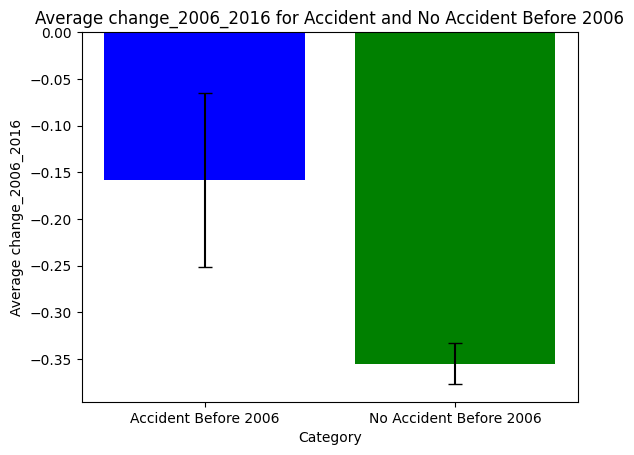

In [4]:
import matplotlib.pyplot as plt

# Calculate average values
avg_change_accident = df_accident_before_2006['change_2006_2016'].mean()
avg_change_no_accident = df_no_accident_before_2006['change_2006_2016'].mean()

# Assuming the same standard error for both categories
sem_change_accident = df_accident_before_2006['change_2006_2016'].sem()
sem_change_no_accident = df_no_accident_before_2006['change_2006_2016'].sem()

# Create a bar plot with confidence intervals
labels = ['Accident Before 2006', 'No Accident Before 2006']
averages = [avg_change_accident, avg_change_no_accident]
errors = [sem_change_accident, sem_change_no_accident]

plt.bar(labels, averages, yerr=errors, color=['blue', 'green'], capsize=5)
plt.xlabel('Category')
plt.ylabel('Average change_2006_2016')
plt.title('Average change_2006_2016 for Accident and No Accident Before 2006')
plt.show()


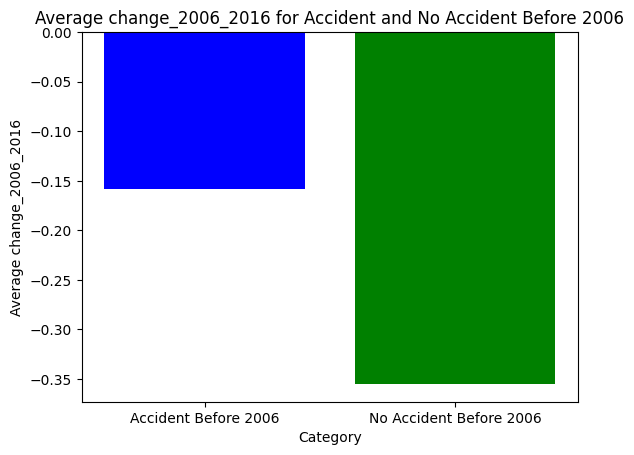

In [5]:
import matplotlib.pyplot as plt

# Calculate average values
avg_change_accident = df_accident_before_2006['change_2006_2016'].mean()
avg_change_no_accident = df_no_accident_before_2006['change_2006_2016'].mean()

# Create a bar plot without confidence intervals
labels = ['Accident Before 2006', 'No Accident Before 2006']
averages = [avg_change_accident, avg_change_no_accident]

plt.bar(labels, averages, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('Average change_2006_2016')
plt.title('Average change_2006_2016 for Accident and No Accident Before 2006')
plt.show()

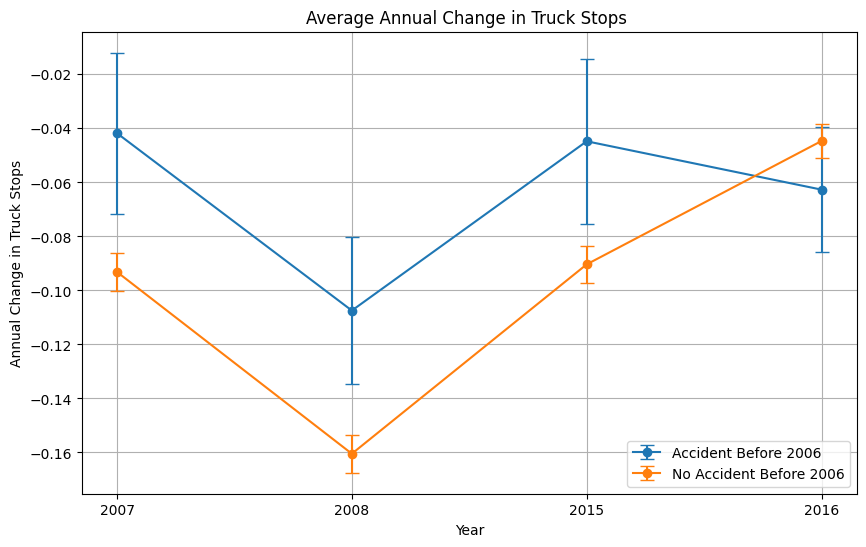

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

def plot_average_change_comparison(treatment, control, treatment_label, control_label, title, ylabel):
    # Calculate averages and SEM for treatment
    avg_treatment_2007 = treatment['change_2007'].mean()
    sem_treatment_2007 = sem(treatment['change_2007'])
    avg_treatment_2008 = treatment['change_2008'].mean()
    sem_treatment_2008 = sem(treatment['change_2008'])
    avg_treatment_2015 = treatment['change_2015'].mean()
    sem_treatment_2015 = sem(treatment['change_2015'])
    avg_treatment_2016 = treatment['change_2016'].mean()
    sem_treatment_2016 = sem(treatment['change_2016'])

    # Calculate averages and SEM for control
    avg_control_2007 = control['change_2007'].mean()
    sem_control_2007 = sem(control['change_2007'])
    avg_control_2008 = control['change_2008'].mean()
    sem_control_2008 = sem(control['change_2008'])
    avg_control_2015 = control['change_2015'].mean()
    sem_control_2015 = sem(control['change_2015'])
    avg_control_2016 = control['change_2016'].mean()
    sem_control_2016 = sem(control['change_2016'])

    # Prepare data for plotting
    years = ['2007', '2008', '2015', '2016']
    avg_treatment = [avg_treatment_2007, avg_treatment_2008, avg_treatment_2015, avg_treatment_2016]
    sem_treatment = [sem_treatment_2007, sem_treatment_2008, sem_treatment_2015, sem_treatment_2016]
    avg_control = [avg_control_2007, avg_control_2008, avg_control_2015, avg_control_2016]
    sem_control = [sem_control_2007, sem_control_2008, sem_control_2015, sem_control_2016]

    # Plot the values with error bars
    plt.figure(figsize=(10, 6))
    plt.errorbar(years, avg_treatment, yerr=sem_treatment, marker='o', label=treatment_label, capsize=5)
    plt.errorbar(years, avg_control, yerr=sem_control, marker='o', label=control_label, capsize=5)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_average_change_comparison(df_accident_before_2006, df_no_accident_before_2006, 'Accident Before 2006', 'No Accident Before 2006', 'Average Annual Change in Truck Stops ', 'Annual Change in Truck Stops')

In [7]:
import pandas as pd
df_5 = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Exploration\5\df_5.csv')
# Ensure REPORT_DATE is in datetime format
df_5['REPORT_DATE'] = pd.to_datetime(df_5['REPORT_DATE'], errors='coerce')

# Create the new column based on the conditions
df_5['has_accident_between_2008_2015'] = ((df_5['REPORT_DATE'].dt.year >= 2008) & 
                                          (df_5['REPORT_DATE'].dt.year <= 2015) & 
                                          (df_5['FATALITIES'] >= 4)).astype(int)


In [8]:
# Filter the DataFrame for the years 2008 to 2015
df_5 = df_5[(df_5['REPORT_DATE'].dt.year >= 2008) & (df_5['REPORT_DATE'].dt.year <= 2014)]




In [9]:
df_5

,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,indicator_2002_2006,...,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor,Region_color,simple_family,has_accident_between_2008_2015
18038,2014-01-18,0,NY,36029,-1.0,0.0,-1.0,1.0,3.0,0,...,Erie,-78.732308,42.764100,NE,Middle America,orange,Buffalo,#9edae5,Traditional,0
18286,2014-08-22,0,NE,31185,0.0,0.0,-1.0,0.0,-1.0,0,...,York,-97.597102,40.872726,MW,Middle America,orange,Kansas City (KS),#d62728,Traditional,0
20827,2012-01-26,0,NC,37107,0.0,0.0,0.0,0.0,0.0,0,...,Lenoir,-77.641527,35.238927,S,Middle America,orange,Raleigh,#f7b6d2,Traditional,0
20832,2014-02-13,0,AL,1071,1.0,0.0,0.0,0.0,1.0,0,...,Jackson,-85.999476,34.779542,S,Containment,green,Nashville,#f7b6d2,Reform,0
21475,2014-02-01,1,FL,12086,-1.0,1.0,0.0,0.0,0.0,0,...,Miami-Dade,-80.559144,25.615116,S,Growth Management,green,Miami,#f7b6d2,Reform,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31765,2008-01-07,0,NC,37023,0.0,0.0,0.0,0.0,-1.0,0,...,Burke,-81.705059,35.749147,S,Middle America,orange,Charlotte (NC),#f7b6d2,Traditional,0
31779,2008-01-10,0,MN,27067,0.0,0.0,0.0,0.0,0.0,0,...,Kandiyohi,-95.005763,45.152523,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional,0
31780,2008-01-05,0,WY,56037,-1.0,0.0,-1.0,1.0,-1.0,0,...,Sweetwater,-108.879388,41.659762,W,High Density,orange,Salt Lake City,#1f77b4,Traditional,0
31785,2008-01-03,0,NV,32003,0.0,-2.0,0.0,0.0,-3.0,0,...,Clark,-115.014609,36.215115,W,Containment,green,Las Vegas (AZ),#1f77b4,Reform,0


In [10]:
# DataFrame where has_accident_between_2008_2015 is equal to 1
df_accident_2008_2015 = df_5[df_5['has_accident_between_2008_2015'] == 1]
df_accident_2008_2015


,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,indicator_2002_2006,...,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor,Region_color,simple_family,has_accident_between_2008_2015
25061,2012-11-15,4,TX,48329,1.0,0.0,0.0,-1.0,2.0,0,...,Midland,-102.031568,31.869041,S,Dallas-San Antonio,red,San Antonio,#f7b6d2,Wild Texas,1
27047,2012-07-19,6,NY,36045,0.0,0.0,0.0,0.0,1.0,0,...,Jefferson,-75.931250,44.047970,NE,Basic Exclusion,blue,Philadelphia (NJ),#9edae5,Exclusion,1
28062,2011-09-13,4,IA,19157,0.0,0.0,1.0,0.0,0.0,0,...,Poweshiek,-92.530971,41.686574,MW,Middle America,orange,Kansas City (MO),#d62728,Traditional,1
28063,2011-09-13,4,IA,19157,0.0,0.0,1.0,0.0,0.0,0,...,Poweshiek,-92.530971,41.686574,MW,Middle America,orange,Kansas City (MO),#d62728,Traditional,1
28064,2011-09-13,4,IA,19157,0.0,0.0,1.0,0.0,0.0,0,...,Poweshiek,-92.530971,41.686574,MW,Middle America,orange,Kansas City (MO),#d62728,Traditional,1


In [11]:

# DataFrame where has_accident_between_2008_2015 is not equal to 1
df_no_accident_2008_2015 = df_5[df_5['has_accident_between_2008_2015'] != 1]
df_no_accident_2008_2015

,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,indicator_2002_2006,...,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor,Region_color,simple_family,has_accident_between_2008_2015
18038,2014-01-18,0,NY,36029,-1.0,0.0,-1.0,1.0,3.0,0,...,Erie,-78.732308,42.764100,NE,Middle America,orange,Buffalo,#9edae5,Traditional,0
18286,2014-08-22,0,NE,31185,0.0,0.0,-1.0,0.0,-1.0,0,...,York,-97.597102,40.872726,MW,Middle America,orange,Kansas City (KS),#d62728,Traditional,0
20827,2012-01-26,0,NC,37107,0.0,0.0,0.0,0.0,0.0,0,...,Lenoir,-77.641527,35.238927,S,Middle America,orange,Raleigh,#f7b6d2,Traditional,0
20832,2014-02-13,0,AL,1071,1.0,0.0,0.0,0.0,1.0,0,...,Jackson,-85.999476,34.779542,S,Containment,green,Nashville,#f7b6d2,Reform,0
21475,2014-02-01,1,FL,12086,-1.0,1.0,0.0,0.0,0.0,0,...,Miami-Dade,-80.559144,25.615116,S,Growth Management,green,Miami,#f7b6d2,Reform,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31765,2008-01-07,0,NC,37023,0.0,0.0,0.0,0.0,-1.0,0,...,Burke,-81.705059,35.749147,S,Middle America,orange,Charlotte (NC),#f7b6d2,Traditional,0
31779,2008-01-10,0,MN,27067,0.0,0.0,0.0,0.0,0.0,0,...,Kandiyohi,-95.005763,45.152523,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional,0
31780,2008-01-05,0,WY,56037,-1.0,0.0,-1.0,1.0,-1.0,0,...,Sweetwater,-108.879388,41.659762,W,High Density,orange,Salt Lake City,#1f77b4,Traditional,0
31785,2008-01-03,0,NV,32003,0.0,-2.0,0.0,0.0,-3.0,0,...,Clark,-115.014609,36.215115,W,Containment,green,Las Vegas (AZ),#1f77b4,Reform,0


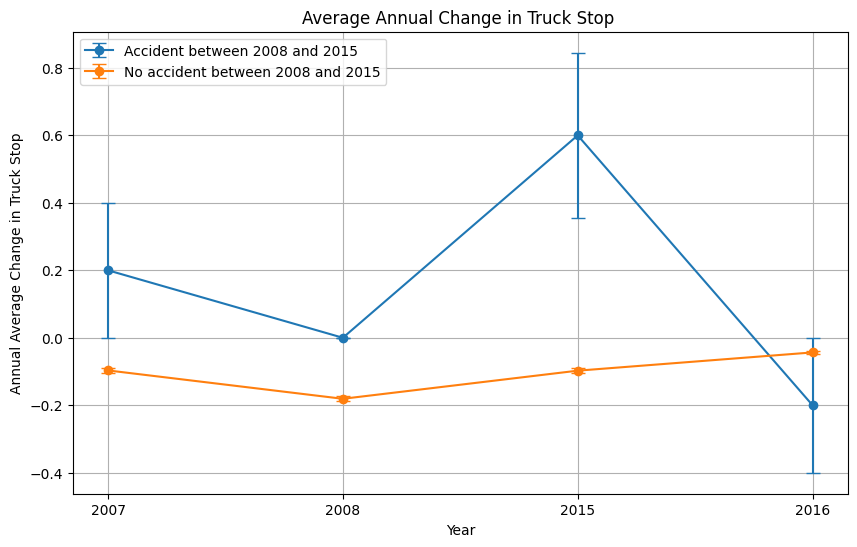

In [12]:
plot_average_change_comparison(df_accident_2008_2015, df_no_accident_2008_2015,'Accident between 2008 and 2015', 'No accident between 2008 and 2015', 'Average Annual Change in Truck Stop ','Annual Average Change in Truck Stop')

In [13]:
df_5 = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Exploration\5\df_5.csv')
# Ensure REPORT_DATE is in datetime format
df_5['REPORT_DATE'] = pd.to_datetime(df_5['REPORT_DATE'], errors='coerce')
df_5 = df_5.drop(columns=['has_accident_before_2006'])

df_5['has_accident_before_2006'] = ((df_5['FATALITIES'] > 3) & (df_5['REPORT_DATE'] < '2006-01-01')).astype(int)

df_5 = df_5[(df_5['REPORT_DATE'].dt.year >= 1990) & (df_5['REPORT_DATE'].dt.year <= 2006)]

df_accident_before_2006 = df_5[df_5['has_accident_before_2006'] == 1]
df_no_accident_before_2006 = df_5[df_5['has_accident_before_2006'] == 0]

In [14]:
df_accident_before_2006

,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,indicator_2002_2006,...,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor,Region_color,simple_family,has_accident_before_2006
34222,2005-10-16,5,WI,55035,0.0,0.0,0.0,1.0,2.0,1,...,Eau Claire,-91.286092,44.726614,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional,1
34228,2005-07-29,4,NV,32007,0.0,0.0,0.0,0.0,1.0,1,...,Elko,-115.357884,41.146016,W,High Density,orange,Salt Lake City,#1f77b4,Traditional,1
35488,2004-06-29,5,KS,20115,0.0,0.0,0.0,0.0,0.0,1,...,Marion,-97.097129,38.358999,MW,Middle America,orange,Kansas City (KS),#d62728,Traditional,1
35489,2004-06-29,5,KS,20115,0.0,0.0,0.0,0.0,0.0,1,...,Marion,-97.097129,38.358999,MW,Middle America,orange,Kansas City (KS),#d62728,Traditional,1
37355,1998-06-20,7,PA,42061,0.0,0.0,0.0,0.0,0.0,0,...,Huntingdon,-77.981407,40.416886,S,Containment-Lite,green,Washington (MD),#f7b6d2,Reform,1
41581,1999-06-03,5,TN,47117,0.0,0.0,0.0,0.0,0.0,0,...,Marshall,-86.765910,35.468434,S,Containment,green,Nashville,#f7b6d2,Reform,1


In [15]:
df_no_accident_before_2006

,REPORT_DATE,FATALITIES,STATE,COUNTY,change_2007,change_2008,change_2015,change_2016,change_2006_2016,indicator_2002_2006,...,name,Longitude,Latitude,Region,Family,Color,Nearest Neighbor,Region_color,simple_family,has_accident_before_2006
28710,2005-11-25,0,OH,39049,0.0,0.0,0.0,-2.0,0.0,1,...,Franklin,-83.009123,39.969272,MW,Middle America,orange,Columbus,#d62728,Traditional,0
28711,2005-11-14,0,OH,39133,0.0,0.0,0.0,0.0,0.0,1,...,Portage,-81.197368,41.167908,MW,Middle America,orange,Cleveland,#d62728,Traditional,0
28712,2005-09-22,0,OH,39143,0.0,0.0,-1.0,0.0,1.0,1,...,Sandusky,-83.144199,41.357304,MW,Middle America,orange,Detroit,#d62728,Traditional,0
28713,2005-07-12,0,OH,39133,0.0,0.0,0.0,0.0,0.0,1,...,Portage,-81.197368,41.167908,MW,Middle America,orange,Cleveland,#d62728,Traditional,0
28714,2005-07-01,0,OH,39103,0.0,0.0,0.0,0.0,0.0,1,...,Medina,-81.899862,41.117706,MW,Middle America,orange,Cleveland,#d62728,Traditional,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41590,1997-09-23,0,SD,46099,1.0,0.0,0.0,-1.0,-1.0,0,...,Minnehaha,-96.791455,43.674134,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional,0
41591,2000-07-16,0,SD,46093,2.0,0.0,0.0,1.0,5.0,0,...,Meade,-102.716646,44.566675,W,Growth Control,green,Denver,#1f77b4,Reform,0
41592,2001-02-03,0,SD,46099,1.0,0.0,0.0,-1.0,-1.0,0,...,Minnehaha,-96.791455,43.674134,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional,0
41593,1999-01-20,0,SD,46099,1.0,0.0,0.0,-1.0,-1.0,0,...,Minnehaha,-96.791455,43.674134,MW,Middle America,orange,Minneapolis (MN),#d62728,Traditional,0


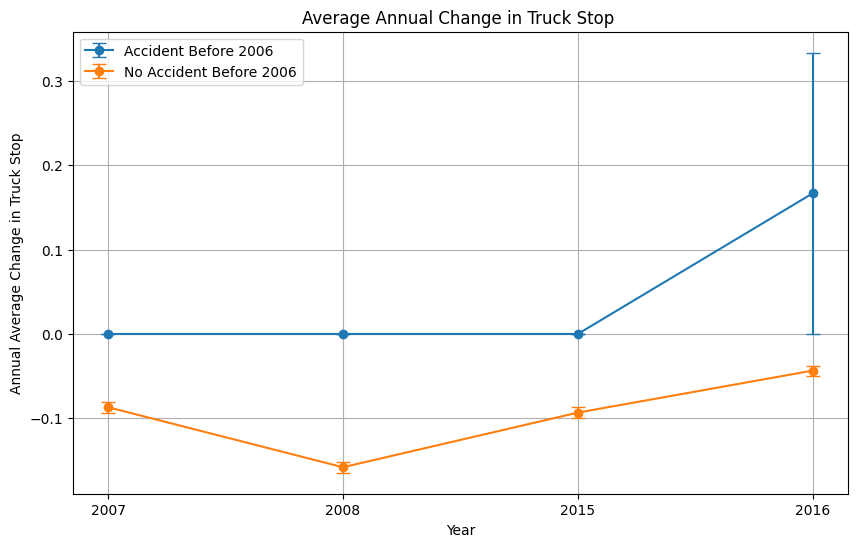

In [16]:

plot_average_change_comparison(df_accident_before_2006, df_no_accident_before_2006, 'Accident Before 2006', 'No Accident Before 2006','Average Annual Change in Truck Stop ','Annual Average Change in Truck Stop')

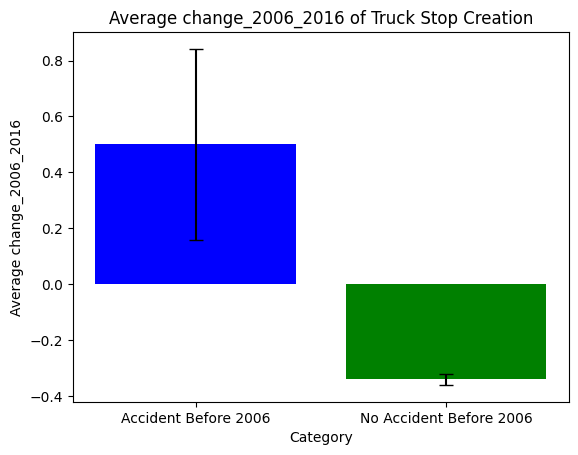

In [17]:
import matplotlib.pyplot as plt

# Calculate average values
avg_change_accident = df_accident_before_2006['change_2006_2016'].mean()
avg_change_no_accident = df_no_accident_before_2006['change_2006_2016'].mean()

# Assuming the same standard error for both categories
sem_change_accident = df_accident_before_2006['change_2006_2016'].sem()
sem_change_no_accident = df_no_accident_before_2006['change_2006_2016'].sem()

# Create a bar plot with confidence intervals
labels = ['Accident Before 2006', 'No Accident Before 2006']
averages = [avg_change_accident, avg_change_no_accident]
errors = [sem_change_accident, sem_change_no_accident]

plt.bar(labels, averages, yerr=errors, color=['blue', 'green'], capsize=5)
plt.xlabel('Category')
plt.ylabel('Average change_2006_2016')
plt.title('Average change_2006_2016 of Truck Stop Creation')
plt.show()


talk about my control group being no accidents vs accidents.
